# Bank Marketing
### Mentored by Dipayan Sarkar, Algoritmo Lab
##### Submentored   by Tumpa Banerjee
  
_________________________________________________________________________________________________________  
  
## Data Set Information
The Original Dataset contains 41188 entries of row of data with 21 numerical/categorical attributes. This dataset provides us the information of the person and determining the information given, we have to determine whether the person has availed the term deposit.

#### Number of Instances : 41188 Entries  
#### Number of Attributes : 21 Attributes
These are all the attributes in the dataset with its description
   
  - 1 - age (numeric)
  - 2 - job : type of job (categorical)
      - "admin."
      - "blue-collar"
      - "entrepreneur"
      - "housemaid"
      - "management"
      - "retired"
      - "self-employed"
      - "services"
      - "student"
      - "technician"
      - "unemployed"
      - "unknown"
      
  - 3 - marital : marital status (categorical)
      - "divorced" #note: "divorced" means divorced or widowed)
      - "married" 
      - "single"
      - "unknown"
      
  - 4 - education (categorical)
      - "basic.4y"
      - "basic.6y"
      - "basic.9y"
      - "high.school"
      - "illiterate"
      - "professional.course"
      - "university.degree"
      - "unknown"
  - 5 - default: has credit in default? (categorical)
      - "no"
      - "yes"
      - "unknown"
  - 6 - housing: has housing loan? (categorical)
      - "no"
      - "yes"
      - "unknown"
  - 7 - loan: has personal loan? (categorical)
      - "no"
      - "yes"
      - "unknown")
   
> related with the last contact of the current campaign:
   
  - 8 - contact: contact communication type (categorical)
      - "cellular"
      - "telephone"
  - 9 - month: last contact month of year (categorical)
      - "jan"
      - "feb"
      - "mar"
      - .
      - .
      - .
      - "nov"
      - "dec"
  - 10 - day_of_week: last contact day of the week (categorical)
      - "mon"
      - "tue"
      - "wed"
      - "thu"
      - "fri"
  - 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
> other attributes:
   
  - 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  - 14 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 15 - poutcome: outcome of the previous marketing campaign (categorical)
      - "failure"
      - "nonexistent" 
      - "success")
> social and economic context attributes
   
  - 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  - 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  - 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  - 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  - 20 - nr.employed: number of employees - quarterly indicator (numeric)

> Output variable (desired target):
  
  - 21 - y - has the client subscribed a term deposit? 
      - (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


## Index:

1. **[Import packages](#imports)**
2. **[Data Preparation](#data_prep)**
    - 2.1 - [Dimensions of the Dataset](#data_dimension)
    - 2.2 - [Pre-Preparation](#pre_prep)
    - 2.3 - [Statistical Summary](#stat_sum)
3. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 3.1 - [Correlation](#correlation)
4. **[Logistic Regression](#log_reg)**
    - 4.1 - [Preparation of datasets](#prep_data)
    - 4.2 - [Building Logistic Regression Base Model](#base_model)
5. **[End of Documentation](#end)**

<a id='imports'></a>
# 1. Imports

In [2]:
##Importing all of our imports needed in this file
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve

### User Defined Functions

This section holds all of the functions created which may be used in the program to simplify the code

In [3]:
def show_unique(value):
    print(value.unique())

<a id='data_prep'></a>
# 2. Data Preparation
Data Preparation is a pre-processing step in which data from one or more sources is cleaned and transformed to improve its quality prior to its use in business analytics. We do this to ensure that data is consistent and of high quality.   

When data is of excellent quality it can be easily processed and analyzed, leading to insights that help the organization make better decisions. High-quality data is essential to business intelligence efforts and other types of data analytics, as well as better overall operational efficiency.
_________________________________________________________________________________________________________  
  

Reading the 'bank-additional-full.csv' file and storing it in a Dataframe

In [4]:
df=pd.read_csv('bank-additional-full.csv',sep=";")

<a id='data_dimension'></a>
### 2.1 Dimensions of the Dataset
Getting the Dimensions of the Dataframe

In [5]:
df.shape

(41188, 21)

<a id='pre_prep'></a>
### 2.2 Pre-Preparation
Here we make the necessary changes which will simplify and increase our efficiency and speed of our workflow

Increasing the maximum number of rows and columns to '10000'

In [6]:
pd.options.display.max_rows=10000
pd.options.display.max_columns=10000

Increasing the maximum width of the column to '1000'

In [7]:
pd.set_option('display.max_colwidth', 1000)

Printing top 10 data from the csv

In [8]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Note: We can easily verify the data given in the dataframe above

Having a look at all the datatypes present in the DataFrame and missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<a id='stat_sum'></a>
### 2.3 Statistical Summary
Here we take a look at the summary of each attribute.

This includes the count, mean, the min and max values as well as percentiles.

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<a id='exploratory_data_analysis'></a>
# 3. Exploratory Data Analysis

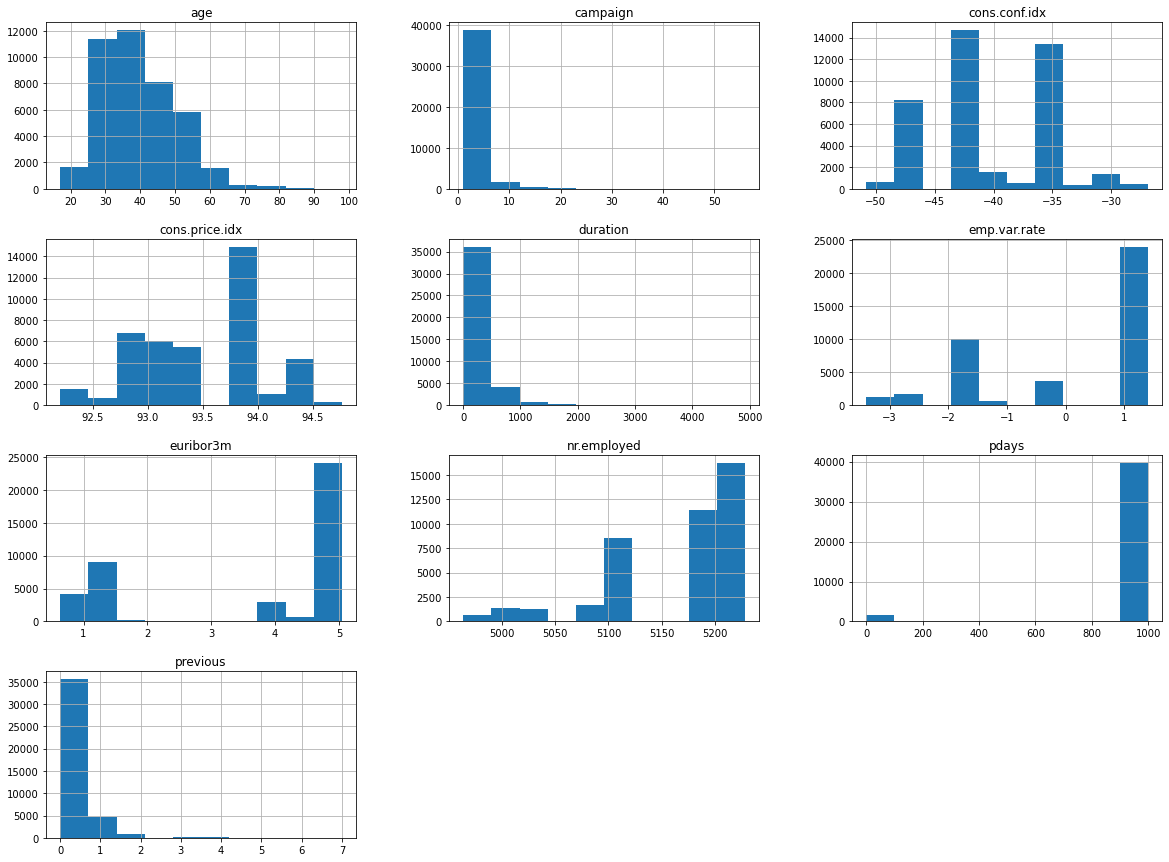

In [11]:
df.hist(figsize=(20,15))
plt.show()

Checking the unique values in the Dataframe present

In [12]:
show_unique(df['y'])

['no' 'yes']


Printing the Total number of rows

In [13]:
len(df)

41188

Lets check if there are any Missing values in our Dataset using : isna() or isnull()

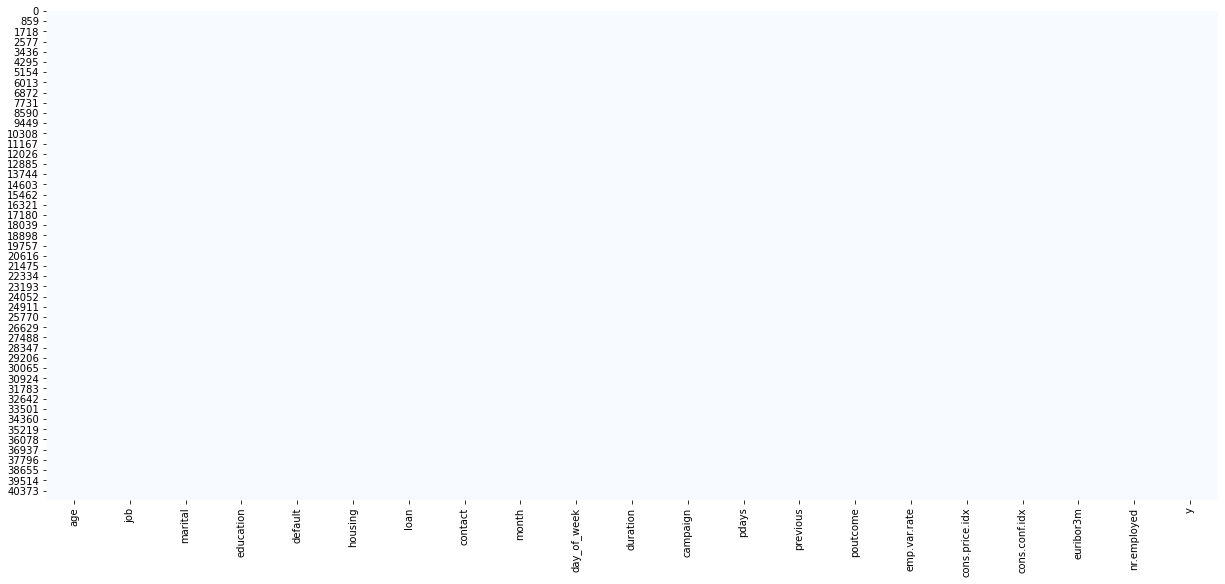

In [14]:
##Setting the figsize as 21,9 for the graph to fit in the screen more efficiently
fig, ax = plt.subplots(figsize=(21,9))
#Plotting the heatmap to check Missing Values
sns.heatmap(df.isna(),cbar=False,cmap="Blues")
plt.show()

Counting the occurence of each unique values present in our Target Variable 'y'

In [15]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Converting the Target variables data from string('yes','no') to int(1,0), respectively

In [16]:
##Changing 'yes' to 1 and 'no' to 0, because target variable has to be a numerical variable
df.loc[df['y'] == 'yes', 'y'] = 1
df.loc[df['y'] == 'no', 'y'] = 0
##Cast datas of 'y' columns into int64 datatype
df['y']=df['y'].astype('int64')
##Verifying the changes
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

<a id='correlation'></a>
### 3.1 Correlation 

In [17]:
# Checking the Correlation
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


Creating a Annotted Heatmap using corr() to find correlation between variables present in the DataFrame

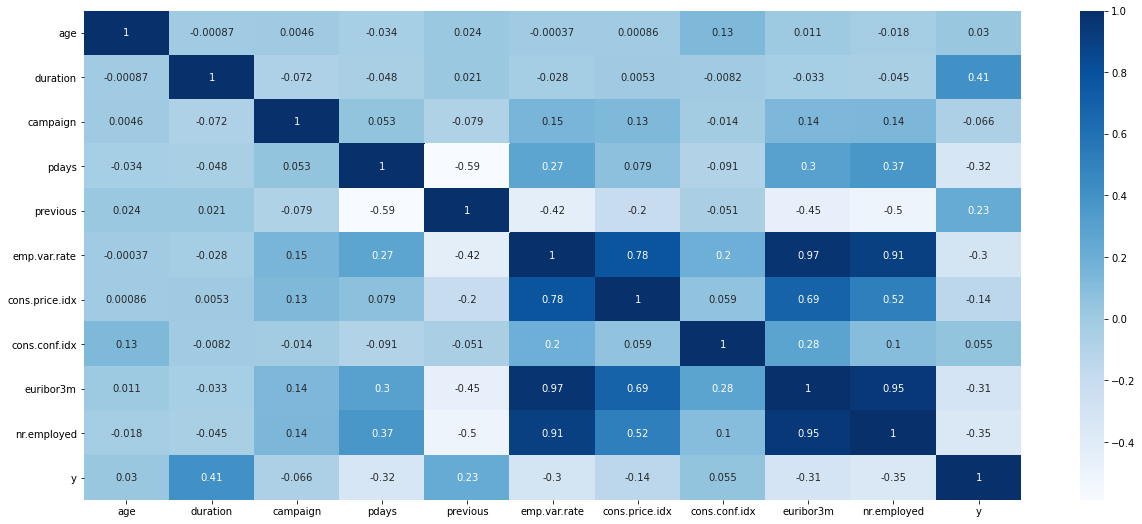

In [18]:
##Setting the figsize as 21,9 for the graph to fit in the screen more efficiently
fig, ax = plt.subplots(figsize=(21,9))
##Plotting the heatmap to check correlation
sns.heatmap(df.corr(),cmap="Blues",annot=True)
#plt.show()

<a id='log_reg'></a>
# 4. Logistic Regression

<a id='prep_data'></a>
## 4.1 Preparation of Datasets

Separating the Independent and Target Variables into X,y, respectively

In [19]:
#Creating Target and Independent variables
y=df['y']
X=df.drop(['y'], axis=1)

Encoding the categorical variables using n-1 Dummy Encoding

In [20]:
X_encoded=pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [20]:
##Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=123)

In [21]:
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (37069, 63)
x_test  (4119, 63)
y_train  (37069,)
y_test  (4119,)


<a id='base_model'></a>
## 4.2 Building Logistic Regression Base Model

In [22]:
model = sm.Logit(y_train,X_train).fit()

         Current function value: 0.208488
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [23]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                37069
Model:                          Logit   Df Residuals:                    37016
Method:                           MLE   Df Model:                           52
Date:                Sat, 27 Mar 2021   Pseudo R-squ.:                  0.4092
Time:                        15:49:18   Log-Likelihood:                -7728.4
converged:                      False   LL-Null:                       -13082.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                               0.0005      0.003      0.191      0.848      -0.005       0.006
duration                          0.0046   7.77e-05     59.727      0.000       0.004       0.005
campaign                         -0.0391      0.012     -3.230      0.001      -0.063      -0.015
pdays                            -0.0009      0.000     -4.055      0.000      -0.001      -0.000
previous                         -0.0529      0.062     -0.857      0.391      -0.174       0.068
emp.var.rate                     -1.8310      0.148    -12.330      0.000      -2.122      -1.540
cons.price.idx                    2.3467      0.263      8.917      0.000       1.831       2.862
cons.conf.idx                     0.0234      0.008      2.866      0.004       0.007       0.039
euribor3m                         0.2837      0.136      2.087      0.037       0.017       0.550
nr.employed                       0.0073      0.003      2.255      0.024       0.001       0.014
job_admin.                       -8.6381   4.79e+05   -1.8e-05      1.000    -9.4e+05     9.4e+05
job_blue-collar                  -8.9190   4.79e+05  -1.86e-05      1.000   -9.39e+05    9.39e+05
job_entrepreneur                 -8.8255   4.79e+05  -1.84e-05      1.000   -9.39e+05    9.39e+05
job_housemaid                    -8.6887   4.82e+05   -1.8e-05      1.000   -9.44e+05    9.44e+05
job_management                   -8.7224   4.82e+05  -1.81e-05      1.000   -9.44e+05    9.44e+05
job_retired                      -8.3627    4.8e+05  -1.74e-05      1.000   -9.41e+05    9.41e+05
job_self-employed                -8.7732   4.79e+05  -1.83e-05      1.000   -9.38e+05    9.38e+05
job_services                     -8.7983   4.78e+05  -1.84e-05      1.000   -9.36e+05    9.36e+05
job_student                      -8.4210   4.81e+05  -1.75e-05      1.000   -9.43e+05    9.43e+05
job_technician                   -8.6364   4.78e+05  -1.81e-05      1.000   -9.37e+05    9.37e+05
job_unemployed                   -8.6364    4.8e+05   -1.8e-05      1.000    -9.4e+05     9.4e+05
job_unknown                      -8.6596    4.8e+05   -1.8e-05      1.000   -9.42e+05    9.42e+05
marital_divorced                -26.1115        nan        nan        nan         nan         nan
marital_married                 -26.0887        nan        nan        nan         nan         nan
marital_single                  -26.0021        nan        nan        nan         nan         nan
marital_unknown                 -26.0246        nan        nan        nan         nan         nan
education_basic.4y              -13.2624        nan        nan        nan         nan         nan
education_basic.6y              -13.0285        nan        nan        nan         nan         nan
education_basic.9y              -13.2371        nan        nan        nan         nan         nan
education_high.school           -13.1976        nan        nan        nan         nan         nan
educati

In [24]:
train_predict = model.predict(X_train)
test_predict=y_pred = model.predict(X_test)

In [25]:
train_predict = [0 if x <.5 else 1 for x in train_predict]
test_predict = [0 if x <.5 else 1 for x in test_predict]

In [26]:
y_pred1 = model.predict(X_test)

Making y_pred as a DataFrame

In [27]:
predicted_df = pd.DataFrame(y_pred1)

Converting the predicted class data into 0 and 1 based on threshold value of 0.5

In [28]:
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.50,1,0)

### Model Accuracy
We will calculate the model accuracy on the test dataset using ‘score’ function.

In [29]:
# Checking the accuracy with test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predicted_df['Predicted_Class']))

0.9135712551590192


This model gives us 91% accuracy

# Evaluate The Model
## Confusion Matrix
The Confusion matrix is used to describe the performance of classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.

![](https://tatwan.github.io/images/mock.png)

* TN = True Negative
* FN = False Negative
* FP = False Positive
* TP = True Positive

In [30]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted_df['Predicted_Class']).ravel()
confusion_matrix

array([3581,   90,  266,  182], dtype=int64)

The results from the confusion matrix are telling us that 3581 and 182 are the number of correct predictions. 90 and 266 are the number of incorrect predictions.

# Classification Report
This is another method to examine the performance of classification model.

- sensitivity = TP / (TP+FN)
- specificity = TN /(TN + FP)
- precision = TP / (TP+FP)
- F1_score = (2 * precision * sensitivity)/(precision+sensitivity)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_df['Predicted_Class']))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3671
           1       0.67      0.41      0.51       448

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119



The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.

# ROC Curve
The ROC curve as well as the area under the ROC curve (AUC). The ROC curve is a simple plot that shows the tradeoff between the true positive rate and the false positive rate of a classifier for various choices of the probability threshold. 
![](http://gim.unmc.edu/dxtests/roccomp.jpg)
Here we see three ROC curves that are labelled as 'Excellent', 'Good', and 'Worthless'. These represent the results of three different classifiers of various usefulness. The x-axis show the false positive rate (FPR) from 0 to 1 and the y-axis shows the true positive rate (TPR) from 0 to 1. The plotted lines show, for various cutpoints or choices of threshold, what the these rates are. The closer the curve gets to the top left corner the better the classifier. Notice that a perfect classifier would yield a true positive rate of 1 and a false positive rate of 0. In such an ideal case, the ROC curve would be a straight line from (0,0) to (0,1) and a horizontal line from (0,1) to (1,1). This is why the area under the curve is used as a singular measure for assessing the usefulness of a classifier.

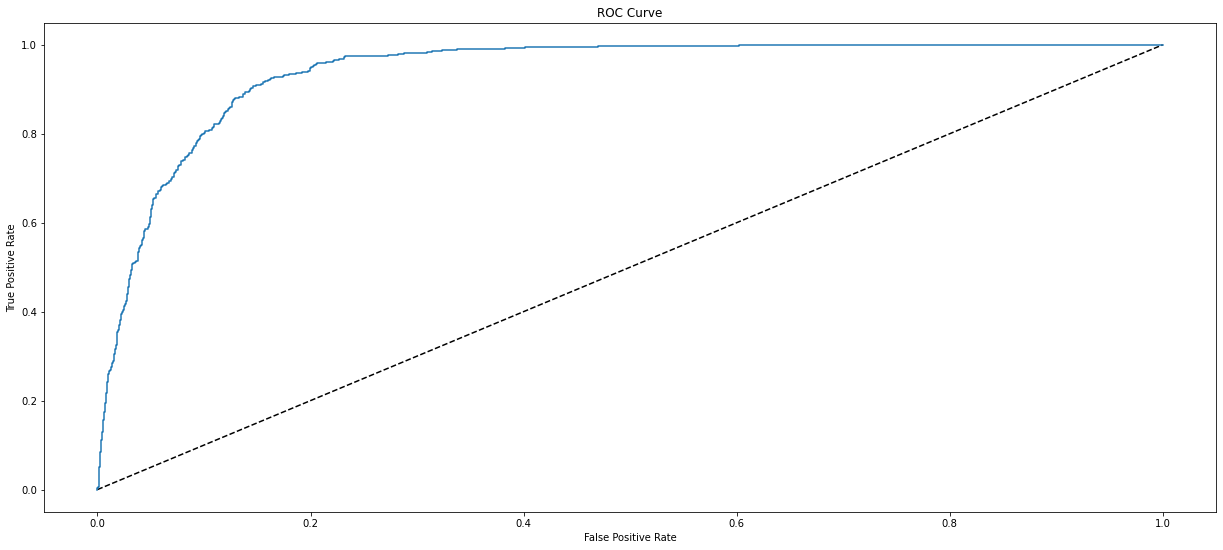

In [32]:
fig, ax = plt.subplots(figsize=(21,9))
y_pred_prob = model.predict(X_test)

from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AUC

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predicted_df['Predicted_Class'])

0.6908667597384909

In [34]:
cols = ['Model','R-Squared Value','ROC Score', 'Precision Score', 'Recall Score','Accuracy Score','Model Description']
df_models = pd.DataFrame(columns = cols)

model_1 = pd.Series({'Model': "Model 1",
                  'R-Squared Value': model.prsquared,
                 'ROC Score' : roc_auc_score(y_test, predicted_df['Predicted_Class']),
                 'Precision Score': metrics.precision_score(y_test, predicted_df['Predicted_Class']),
                 'Recall Score': metrics.recall_score(y_test, predicted_df['Predicted_Class']),
                 'Accuracy Score': metrics.accuracy_score(y_test, predicted_df['Predicted_Class']),
                 'Model Description': "Logistic Regression Base Model"})

model1_report = df_models.append(model_1, ignore_index = True)
model1_report


,Model,R-Squared Value,ROC Score,Precision Score,Recall Score,Accuracy Score,Model Description
0,Model 1,0.409249,0.690867,0.669118,0.40625,0.913571,Logistic Regression Base Model


# Some Other Methods which can be implemented to get a better result :
- SMOTE to create some more rows having less values
- Try removing 'Unknown' with MV and then removing those MV which are effecting the Dataset
- Try removing variables having High-correlation to ease the prediction
- Try altering variables

<a id='end'></a>